In [1]:
pip install pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

trades_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

In [3]:
print(trades_df.head())
print(trades_df.info())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [5]:
print(sentiment_df.head())
print(sentiment_df.info())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [8]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [11]:
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'])

ValueError: time data "18-03-2025 12:50" doesn't match format "%m-%d-%Y %H:%M", at position 18. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [14]:
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst = True)

In [15]:
trades_df['Date'] = trades_df['Timestamp IST'].dt.date

In [17]:
trades_df['Date'] = pd.to_datetime(trades_df['Date'])

In [18]:
print(trades_df.duplicated().sum())

0


In [19]:
print(trades_df.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
dtype: int64


In [20]:
trades_df.drop_duplicates(inplace=True)

In [21]:
trades_df.dropna(subset=['Closed PnL','Side','Coin'], inplace=True)

In [22]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [23]:
print(sentiment_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [25]:
sentiment_df.dropna(subset=['classification'], inplace = True)

In [27]:
merged_df = pd.merge(trades_df, sentiment_df, on='Date', how='left')

KeyError: 'Date'

In [28]:
print(sentiment_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [29]:
sentiment_df.rename(columns={'date': 'Date', 'classification': 'Classification'}, inplace=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

In [30]:
trades_df['Date'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True).dt.date
trades_df['Date'] = pd.to_datetime(trades_df['Date']) 

In [31]:
merged_df = pd.merge(trades_df, sentiment_df[['Date', 'Classification']], on='Date', how='left')

In [32]:
print(merged_df.info())
print(merged_df['Classification'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [33]:
merged_df.dropna(subset=['Classification'], inplace=True)

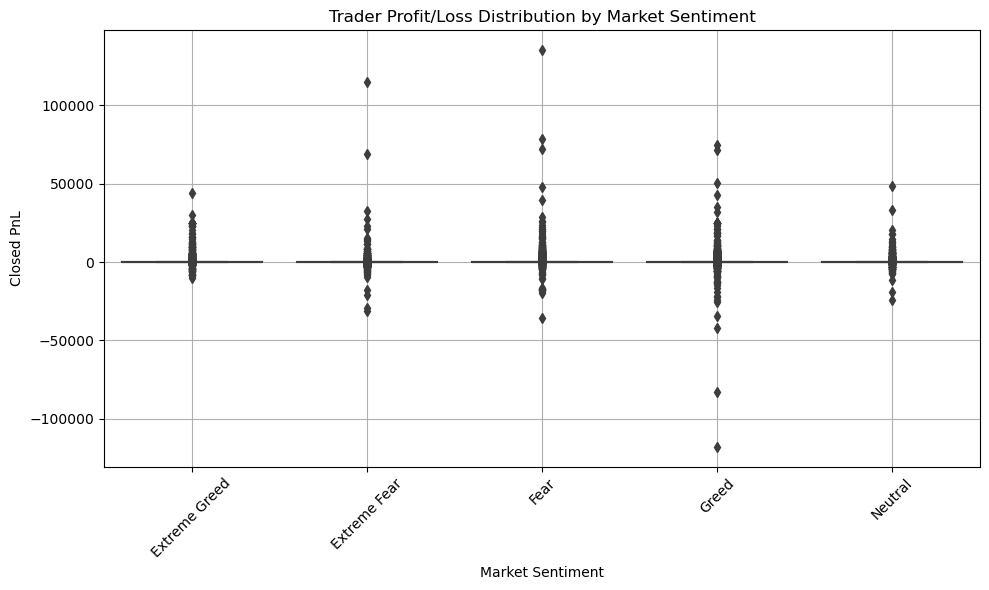

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='Classification',y='Closed PnL')
plt.title('Trader Profit/Loss Distribution by Market Sentiment')
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
avg_pnl = merged_df.groupby('Classification')['Closed PnL'].mean().sort_values(ascending=False)

In [36]:
print(avg_pnl)

Classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


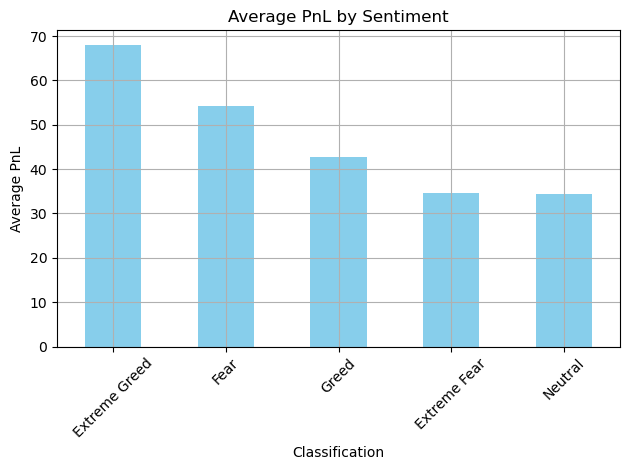

In [37]:
avg_pnl.plot(kind="bar", title = 'Average PnL by Sentiment', color='Skyblue')
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

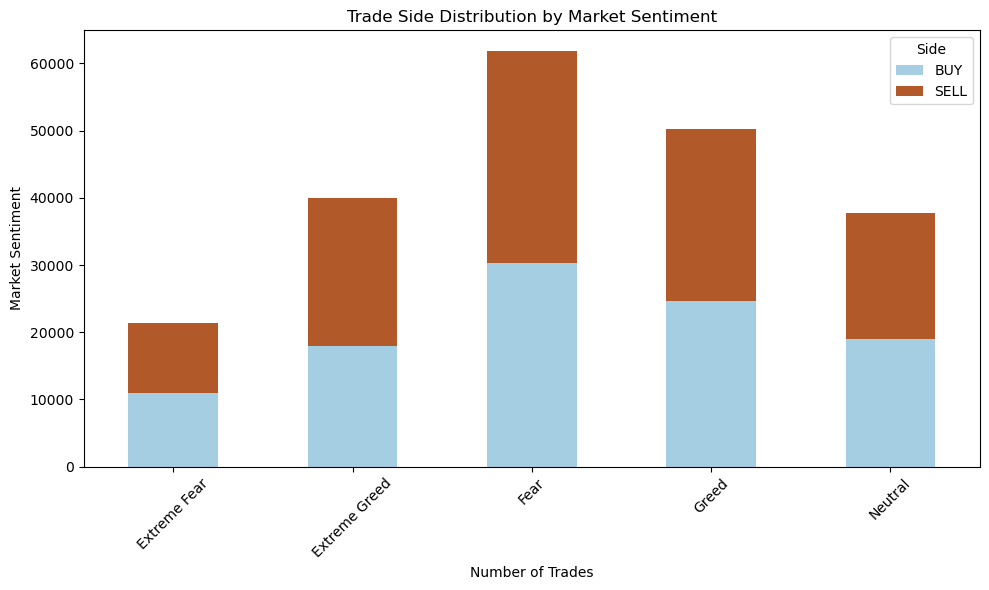

In [38]:
side_sentiment = merged_df.groupby(['Classification','Side']).size().unstack().fillna(0)
side_sentiment.plot(kind='bar',stacked=True,figsize=(10,6),colormap="Paired")
plt.title("Trade Side Distribution by Market Sentiment")
plt.xlabel("Number of Trades")
plt.ylabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

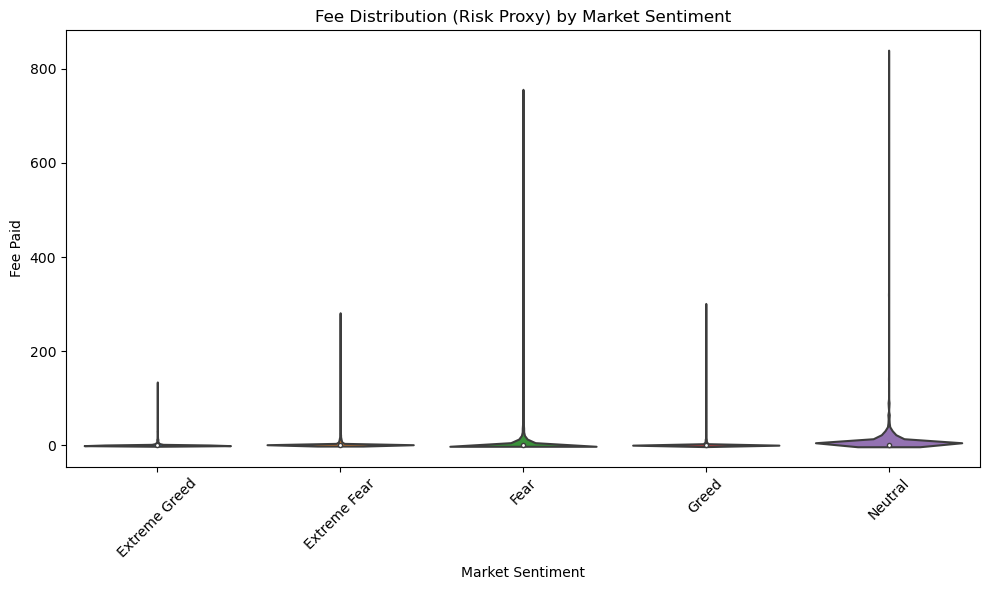

In [39]:
plt.figure(figsize=(10,6))
sns.violinplot(data=merged_df, x='Classification', y='Fee', inner='box', scale='width')
plt.title("Fee Distribution (Risk Proxy) by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Fee Paid")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
top_accounts = merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)

In [41]:
print(top_accounts)

Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    3.605395e+05
Name: Closed PnL, dtype: float64


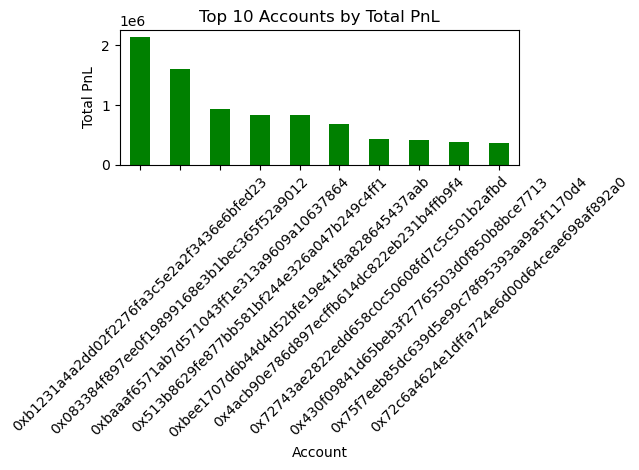

In [42]:
top_accounts.plot(kind='bar', title='Top 10 Accounts by Total PnL', color='green')
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
avg_performance = merged_df.groupby('Account')['Closed PnL'].mean().sort_values(ascending=False).head(10)

In [44]:
print(avg_performance)

Account
0x420ab45e0bd8863569a5efbb9c05d91f40624641    520.902331
0x083384f897ee0f19899168e3b1bec365f52a9012    419.127768
0x430f09841d65beb3f27765503d0f850b8bce7713    336.735548
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    270.034947
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    253.187858
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0    174.691809
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6    161.133275
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    155.589314
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    145.481748
0xae5eacaf9c6b9111fd53034a602c192a04e082ed    120.507317
Name: Closed PnL, dtype: float64


In [45]:
sentiment_account_perf = merged_df.groupby(['Account','Classification'])['Closed PnL'].mean().unstack()

In [46]:
sentiment_account_perf.head()

Classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1247.692214,-42.626810,626.194346,482.089321,298.456334
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-24.912665,43.222903,-0.632623,10.211823,-16.573722
0x271b280974205ca63b716753467d5a371de622ab,20.962214,358.632043,16.125220,-185.221864,-31.783540
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-44.714307,14.437904,9.594371,10.502556,6.207158
0x2c229d22b100a7beb69122eed721cee9b24011dd,101.921855,61.498681,10.444070,79.350486,41.667826


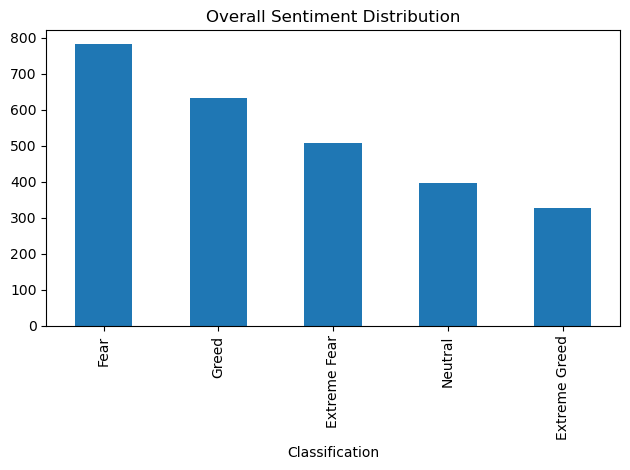

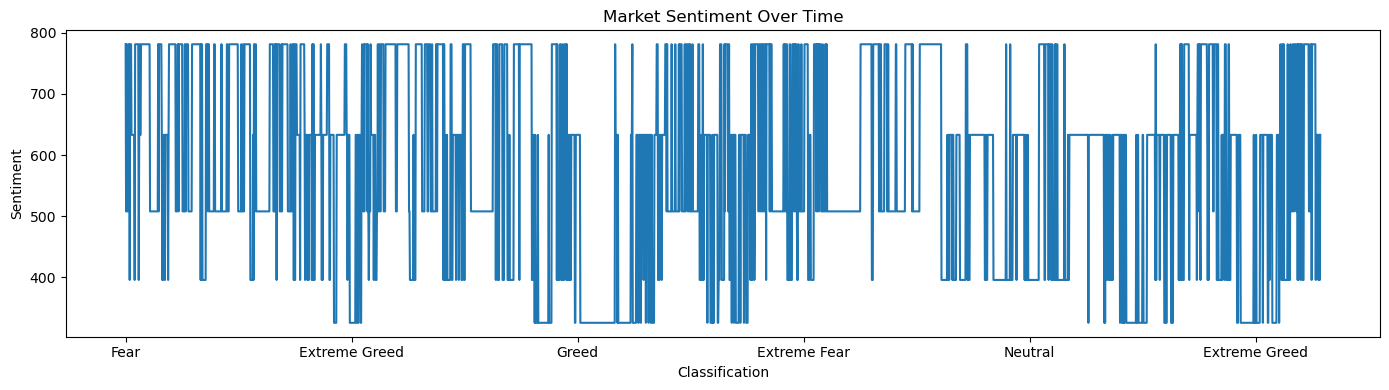

In [47]:
import matplotlib.pyplot as plt

sentiment_df['Classification'].value_counts().plot(kind="bar", title="Overall Sentiment Distribution")
plt.tight_layout()
plt.show()

sentiment_by_day = sentiment_df.groupby('Date')['Classification'].first()

plt.figure(figsize=(14,4))
sentiment_by_day.value_counts().loc[sentiment_by_day].plot()
plt.title("Market Sentiment Over Time")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()

In [48]:
merged_df.to_csv("merged_trader_sentiment.csv", index=False)